<a href="https://colab.research.google.com/github/jaguzman/GENERAL-FundamentosEnHerramientasDeTransformacionDigital/blob/master/Unidad%203%20-%20Aprendizaje%20de%20m%C3%A1quinas/4_An%C3%A1lisis%20de%20Desempe%C3%B1o/AnalisisDeDesempe%C3%B1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de desempeño de los modelos

**Detección de fraude con tarjeta de crédito**

La base de datos tiene el registro de las transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos. La base de datos presenta transacciones que ocurrieron en sólo dos días.

Información del dataset: El conjunto de datos se ha recopilado y analizado durante una colaboración de investigación de Worldline y el Machine Learning Group (http://mlg.ulb.ac.be) de ULB (Université Libre de Bruxelles) sobre minería de datos grandes y detección de fraude.

Más detalles sobre proyectos actuales y pasados sobre temas relacionados están disponibles en https://www.researchgate.net/project/Fraud-detection-5 y la página del proyecto DefeatFraud

**OBJETIVO**

Implementar diferentes modelos de aprendizaje de máquina de clasificación con el objetivo de tener un modelo que pueda reconocer transacciones fraudulentas  de las tarjetas de crédito. Además de eso evaluar cuál es el mejor modelo con las técnicas de análisis de desempeño de los modelos.

**Contenido**

*   Importar librerías
*   Base de datos
*   Descripción y analítica de datos
*   Preparación de los datos para el algoritmo
*   Clasificador

# **LIBRERÍAS**

In [ ]:
# Importar las librerías
import pandas as pd
import numpy as np

# Librerías para graficar
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly as py
#import plotly.graph_objs as go

# Librerías de Aprendizaje de máquinas
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB

# **BASE DE DATOS**

Debido a que la base de datos es muy pesada (más de 100 Mb), se debe descargar del siguiente enlace y cargarlo en el ambiente de prueba de google colab. 

https://drive.google.com/file/d/1bw34FasPiK8zLs_YU0j-SXv-8mHAeiO9/view?usp=sharing

In [ ]:
# Para subir el archivo desde nuestro computador:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
# Luego lo convertimos a un dataframe de pandas
import io
data = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

# Imprimir el tamaño de la base de datos
print(data.shape)
# Imprimir las primeras líneas
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**DESCRIPCIÓN DE LA BASE DE DATOS**

**Registros de las transacciones**

Por motivos de confidencialidad, no se proporcionan las características originales y demás información de sobre los datos. Los datos contienen sólo variables de entrada numéricas que son el resultado de una transformación PCA.  

**[1] Time:** contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos (numérica)

**[2-29] V1, V2, ... V28:** son los componentes principales obtenidos con PCA (numérica)

**[30] Amount:** el monto de la transacción (numérica)

**[31] Class:** contiene las clases (categórica) [0 = no fraudulenta, 1 = fraudulenta]

In [ ]:
# Información de la base de datos: nómbre de la columba, conteo de datos Null y tipo de datos
data.info()
# La base de no tiene datos nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **DESCRIPCIÓN Y ANALÍTICA DE DATOS**

Graficar la cantidad de transacciones fraudulentas y las normales.

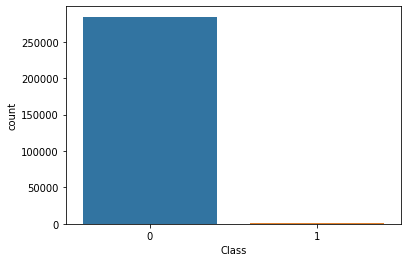

In [ ]:
# Esta función realiza una suma de cada categoría y luego las grafica 
sns.countplot(data['Class']) 

* Se observa que la base de datos está altamente desbalanceada, es decir, no hay casi la misma cantidad de datos en la clase '1' que en la clase '0'. 
* Aunque la precisión de la matriz de confusión no es significativa para un modelo clasificador de una base de datos desbalanceada, igual se graficará.
* También se medirá la precisión utilizando el área bajo la curva de ROC (receiver operating characteristic). 


A continuación, vamos a ver una gráfica de la distribución del número de transacciones fraudulentas  y no fraudulentas en el tiempo.

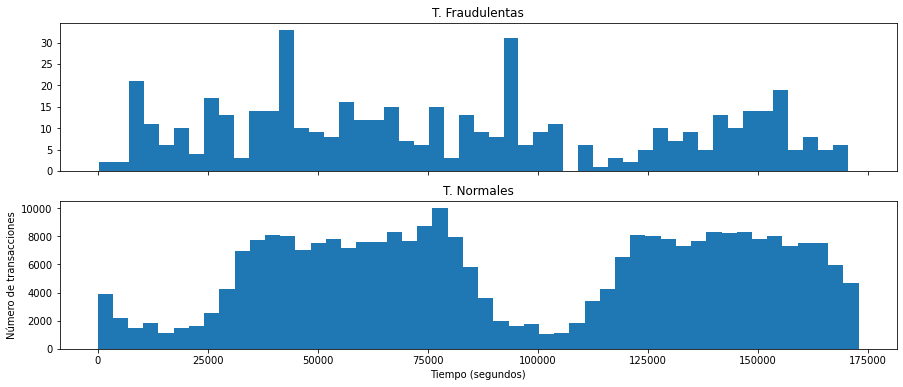

In [ ]:
# crear las variables para la gráfica de la figura y los ejes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# definir el tamaño de la gráfica
fig.set_size_inches(15, 6) 
# número de contenedores de la gráfica (agrupados por 50)
bins = 50
# Columna de la base de datos que se graficará: tiempo si clase = 1
ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('T. Fraudulentas')
# Columna de la base de datos que se graficará: tiempo si clase = 0
ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('T. Normales')
# eje x
plt.xlabel('Tiempo (segundos)')
# eje y
plt.ylabel('Número de transacciones')
# Gráfica
plt.show()

Se podría argumentar que las transacciones fraudulentas se distribuyen de manera uniforme, mientras que las transacciones normales tienen una distribución cíclica.

gráfica de la distribución del número de transacciones fraudulentas y no fraudulentas con respecto al monto.

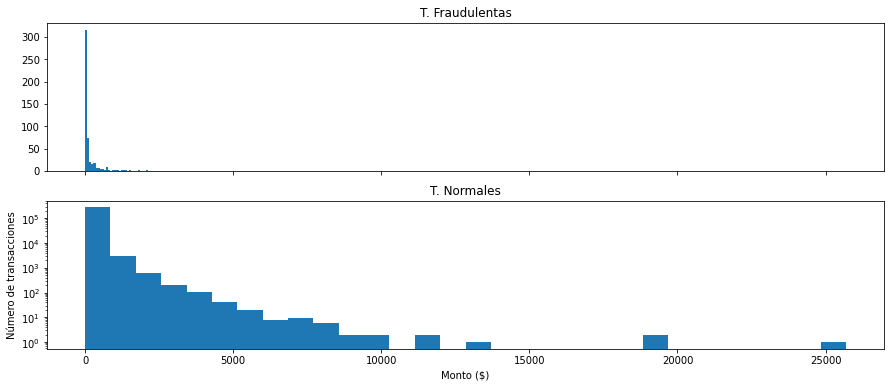

In [ ]:
# crear las variables para la gráfica de la figura y los ejes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# definir el tamaño de la gráfica
fig.set_size_inches(15, 6) 
# número de contenedores de la gráfica (agrupados por 50)
bins = 30
# Columna de la base de datos que se graficará: tiempo si clase = 1
ax1.hist(data.Amount[data.Class == 1], bins = bins)
ax1.set_title('T. Fraudulentas')
# Columna de la base de datos que se graficará: tiempo si clase = 0
ax2.hist(data.Amount[data.Class == 0], bins = bins)
ax2.set_title('T. Normales')
# eje x
plt.xlabel('Monto ($)')
# eje y
plt.ylabel('Número de transacciones')
# Escala del eje Y logarítmica, debido a que las trasnacciones normales son más
plt.yscale('log')
# Gráfica
plt.show()

La mayoría de las transacciones fraudulentas son fraudalentas de bajo monto.
 Veamos la descripción de esos dos grupos.

In [ ]:
data.Amount[data.Class == 0].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
data.Amount[data.Class == 1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Ahora se imprime la distribución de todas las variables.

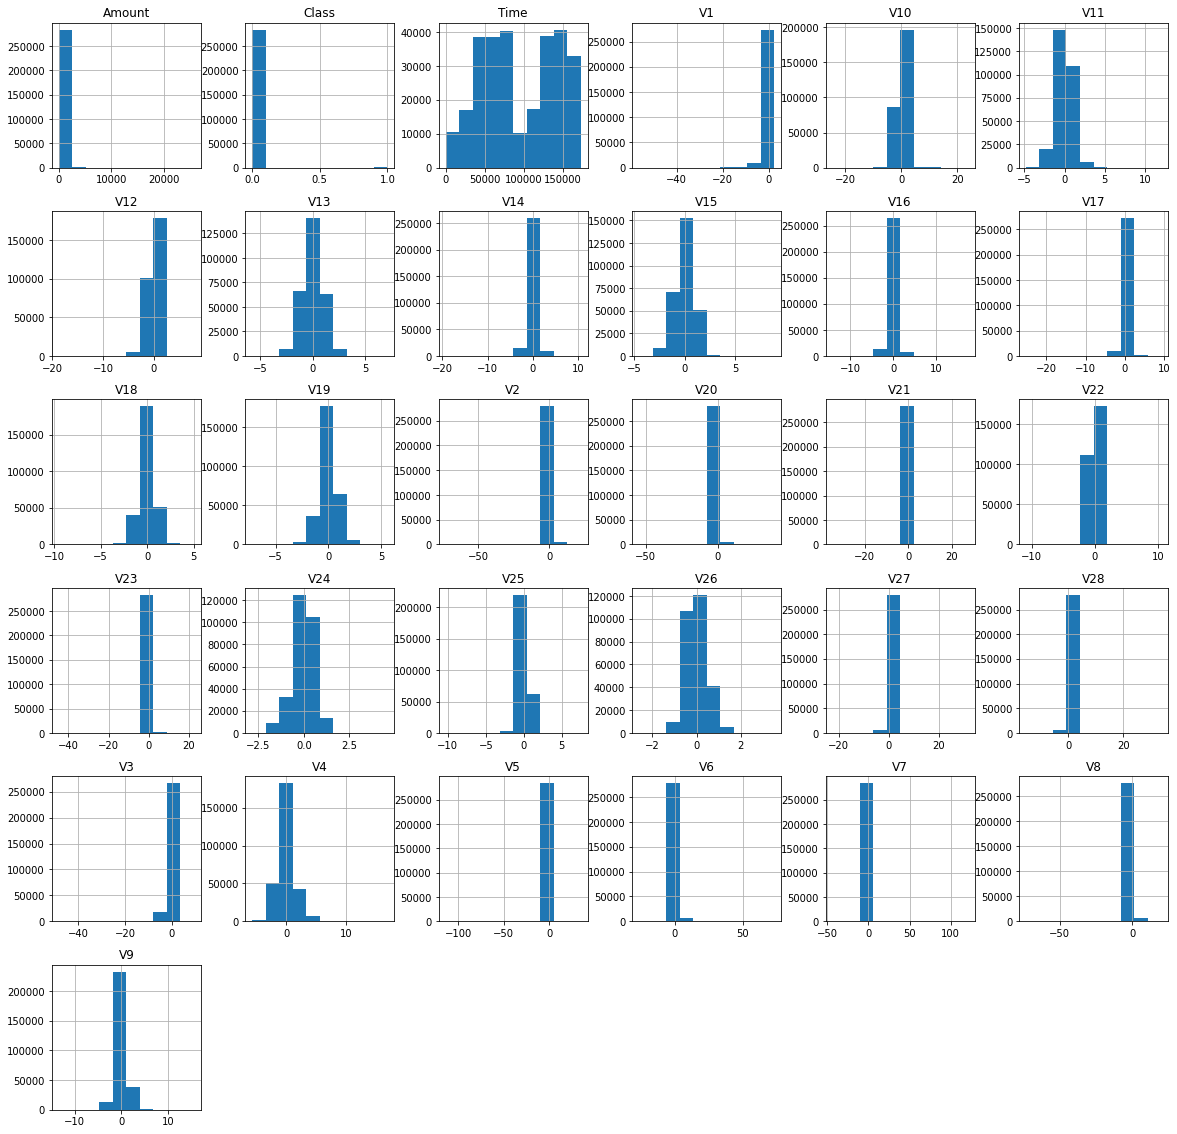

In [ ]:
data.hist(figsize=(20,20))
plt.show()

# **PREPARACIÓN DE LOS DATOS PARA EL ALGORITMO**

Se normalizan los datos

In [ ]:
std_scaler = StandardScaler()

data['scaled_amount'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = std_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


# **CLASIFICADORES**

Se separa la base de datos entre datos de entrenamiento y datos de pruebas

In [ ]:
# Se toma la base de datos menos la variable de interes 'deposit'
x = data.drop('Class', 1)
# Se toma la variable de interes
y = data.Class
# Función que separa los datos datos de X y Y de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [ ]:
y_train.value_counts()

0    227456
1       389
Name: Class, dtype: int64

In [ ]:
y_test.value_counts()

0    56859
1      103
Name: Class, dtype: int64

**Árbol de Decisión**
Medida de precisión con validación cruzada

In [ ]:
# Árbol de Decisión de profundidad máxima
treeModel = tree.DecisionTreeClassifier()
# Entrenamiento del modelo
treeModel.fit(x_train, y_train)
# Cálculo de la precisión media del proceso de entrenamiento
# treeModel_score_train = treeModel.score(x_train, y_train)
training_score = cross_val_score(treeModel, x_train, y_train, cv=2)
# Imprimir el resultado
print("Precisión en el entrenamiento: ", training_score)
# Cálculo de la precisión media del proceso de testeo
#treeModel_score_test = treeModel.score(x_test, y_test)
testing_score = cross_val_score(treeModel, x_test, y_test, cv=2)
# Imprimir el resultado
print("Precisión en el testeo: ",testing_score)

Precisión en el entrenamiento:  [0.99893788 0.99920999]
Precisión en el testeo:  [0.99891156 0.99891156]


Según la precisión el modelo es un modelo excelente, pues durante el entrenamiento y las pruebas fue casi 1.

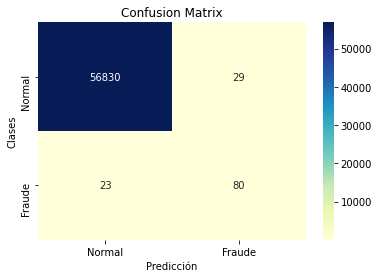

In [ ]:
# Predicción del modelo
y_pred = treeModel.predict(x_test)
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Nombres de las clases
target_names = ['Normal', 'Fraude']
# Propiedades de la gráfica
ax= plt.subplot()
# Imprimir la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
# Nombre del eje x
ax.set_xlabel('Predicción');
# Nombre del eje y
ax.set_ylabel('Clases'); 
# Título de la gráfica
ax.set_title('Confusion Matrix'); 
# Nombres de las clases en eje x
ax.xaxis.set_ticklabels(target_names); 
# Nombres de las clases en eje y
ax.yaxis.set_ticklabels(target_names);

In [ ]:
# reportes del clásificador de árbol de decisión
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56859
      Fraude       0.73      0.78      0.75       103

    accuracy                           1.00     56962
   macro avg       0.87      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962



De los datos se puede ver que para las opciones de transacciones normales o no fraudulentas los valores de precision, recall y f1-score son muy altos, mientras que para las opciones de transacciones fraudulentas el modelo no es tan bueno.

Se imprime la curva de ROC para varios clasificadores diferentes

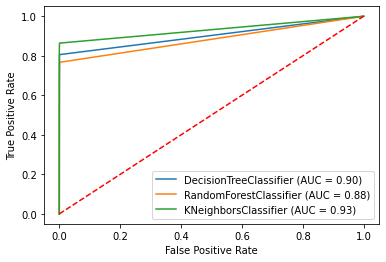

In [ ]:
# Modelo de Árboles de Decisión
dt = DecisionTreeClassifier()
# Modelos de Randmo Forest
rf = RandomForestClassifier(n_estimators = 2)
# Modelo de KNN
knn = KNeighborsClassifier(n_neighbors = 3)

#Entrenamiento de casa uno de los modelos
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
knn.fit(x_train,y_train)

# Imprimir la curva ROC
disp = plot_roc_curve(dt, x_test, y_test) # ax = disp.ax_ this line will share the x axis
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plt.plot([0,1],[0,1],'r--')

Recordemos que la línea punteada representa la curva ROC de un clasificador puramente aleatorio y un buen clasificador se mantiene lo más alejado posible de esa línea.

El mejor modelo es el de regresión logística, pues su curva está más hacia la esquina superior izquierda. 

El siguiente mejor clasificador es el de bayesiana, seguido por RandomForest y finalmente el de Árboles de decisión.

In [ ]:
# Exactitud de todos los modelos

# Modelo de Árboles de Decisión
print("Exactirud de lr: ", dt.score(x_test,y_test))
# Modelos de Randmo Forest
print("Exactirud de rf: ", rf.score(x_test,y_test))
# Modelo de KNN
print("Exactirud de knn: ", knn.score(x_test,y_test))

Exactirud de lr:  0.9989993328885924
Exactirud de rf:  0.9993328885923949
Exactirud de knn:  0.9996137776061234


# **ACTIVIDAD**

Se tiene la base de datos de un banco. Los clientes son activos y el banco está interesado en expandir esta base rápidamente para atraer más negocios de préstamos. Una campaña que el banco realizó el año mostró una tasa de conversión de más del 9% de éxito. Esto ha alentado al departamento de marketing a diseñar campañas para orientar mejor el marketing a fin de aumentar la proporción de éxito con un presupuesto mínimo.

**Objetivo**

El banco quiere construir un modelo que ayude a identificar clientes potenciales con mayor probabilidad de acceder a un préstamo. Esto aumentará la proporción de éxito y al mismo tiempo reducirá el costo de la una campaña de comercialización.

1. Dado un modelo de Árbol de Decisión, cree otros modelos para la base de datos dada. 
2. Evalue cual de los modelos es el que presenta mejores desempeños.

**IMPORTAR LA BASE DE DATOS**

In [ ]:
# Leer los datos desde el GitHub
dataTable = pd.read_csv("https://raw.githubusercontent.com/jaguzman/dataSets/master/datasets/Bank_Personal_Loan_Modelling.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

# Imprimir el tamaño de la base de datos
print(dataTable.__)
# Imprimir las primeras líneas
dataTable.__()

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


**DESCRIPCIÓN DE LA BASE DE DATOS**

**[1] ID:** número de identificación del cliente (numérico)

**[2] Age:** edad del cliente (numérico)

**[3] Experience:** # años de experiencia profesional (numérico)

**[4] Income:** Ingresos anuales del cliente ($ 000) (numérico)

**[5] ZIP Code:** código postal de la vivienda del cliente (numérico)

**[6] Family:** # de integrantes en la familia del cliente (numérico)

**[7] CCAvg:** gasto en tarjetas de crédito por mes ($ 000) (numérico)

**[8] Education	:** Nivel educativo (numérico) [1: Pregrado; 2: graduado; 3: avanzado / profesional]

**[9] Mortgage:** Valor hipotecario de la hipoteca de la casa, si corresponde ($ 000) (numérico)

**[10] Securities Account:** ¿el cliente tiene una cuenta de valores con el banco? (numérico)

**[11] CD Account:** ¿el cliente tiene una cuenta de certificado de depósito (CD) con el banco? (numérico)

**[12] Online:** ¿el cliente usa servicios de banca por Internet? (numérico)

**[13] CreditCard:** ¿el cliente tiene una tarjeta de crédito? (numérico)

**[14] Personal Loan:** ¿el cliente aceptó el préstamo ofrecido en la última campaña? (numérico)

**Modelo de Árbol de Decisión**

In [ ]:
# Se separa la base de datos entre datos de entrenamiento y datos de pruebas

# Se toma la base de datos menos la variable de interes 'Personal Loan'
x = dataTable.drop('__', 1)
# Se toma la variable de interes
y = dataTable['__']
# Función que separa los datos datos de X y Y de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

Clasificador de árbol de decisión

In [ ]:
# Árbol de Decisión de profundidad máxima
treeModel = tree.DecisionTreeClassifier()
# Entrenamiento del modelo
treeModel.fit(__, __)
# Cálculo de la precisión media del proceso de entrenamiento
treeModel_score_train = treeModel.score(x_train, y_train)
# Imprimir el resultado
print("Precisión en el entrenamiento: ", treeModel_score_train)
# Cálculo de la precisión media del proceso de testeo
treeModel_score_test = treeModel.score(x_test, y_test)
# Imprimir el resultado
print("Precisión en el testeo: ", treeModel_score_test)

Precisión en el entrenamiento:  1.0
Precisión en el testeo:  0.981


**Solución 1. Otros modelos.**


In [ ]:
# Modelos de Randmo Forest
rf = RandomForestClassifier(n_estimators = __)
# Modelo de KNN
knn = KNeighborsClassifier(n_neighbors = __)

#Entrenamiento de casa uno de los modelos
treeModel.fit(x_train, y_train)
rf.__(x_train, y_train)
knn.__(x_train,y_train)

# Cálculo de la precisión
treeModel_score_test = treeModel.score(x_test, y_test)
rf_score_test = rf.score(x_test, y_test)
knn_score_test = knn.score(x_test, y_test)

print("Precisión Árbol de Decisión: ", treeModel_score_test)
print("Precisión Random Forest: ", rf_score_test)
print("Precisión KNN: ", knn_score_test)

Precisión Árbol de Decisión:  0.98
Precisión Random Forest:  0.971
Precisión KNN:  0.904


**Solución 2. Desempeño de los modelos.**

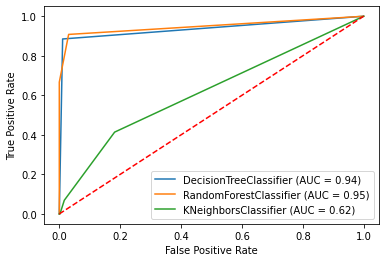

In [ ]:
# Imprimir la curva ROC
disp = plot_roc_curve(treeModel, x_test, y_test) # ax = disp.ax_ this line will share the x axis
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plt.plot([0,1],[0,1],'r--')

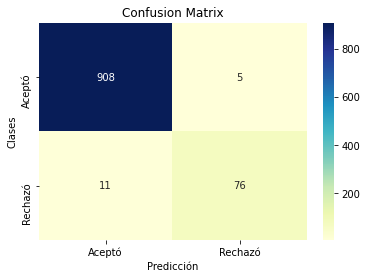

In [ ]:
# Predicción del modelo
y_pred = __.predict(x_test)
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Nombres de las clases
target_names = ['Aceptó', 'Rechazó']
# Propiedades de la gráfica
ax= plt.subplot()
# Imprimir la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
# Nombre del eje x
ax.set_xlabel('Predicción');
# Nombre del eje y
ax.set_ylabel('Clases'); 
# Título de la gráfica
ax.set_title('Confusion Matrix'); 
# Nombres de las clases en eje x
ax.xaxis.set_ticklabels(target_names); 
# Nombres de las clases en eje y
ax.yaxis.set_ticklabels(target_names);

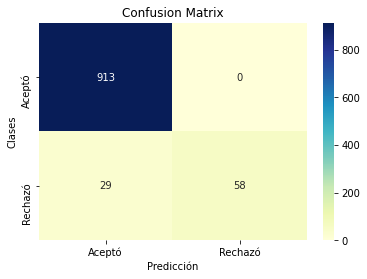

In [ ]:
# Predicción del modelo
y_pred = __.predict(x_test)
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Nombres de las clases
target_names = ['Aceptó', 'Rechazó']
# Propiedades de la gráfica
ax= plt.subplot()
# Imprimir la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
# Nombre del eje x
ax.set_xlabel('Predicción');
# Nombre del eje y
ax.set_ylabel('Clases'); 
# Título de la gráfica
ax.set_title('Confusion Matrix'); 
# Nombres de las clases en eje x
ax.xaxis.set_ticklabels(target_names); 
# Nombres de las clases en eje y
ax.yaxis.set_ticklabels(target_names);

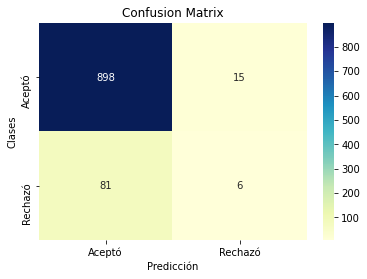

In [ ]:
# Predicción del modelo
y_pred = __.predict(x_test)
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Nombres de las clases
target_names = ['Aceptó', 'Rechazó']
# Propiedades de la gráfica
ax= plt.subplot()
# Imprimir la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
# Nombre del eje x
ax.set_xlabel('Predicción');
# Nombre del eje y
ax.set_ylabel('Clases'); 
# Título de la gráfica
ax.set_title('Confusion Matrix'); 
# Nombres de las clases en eje x
ax.xaxis.set_ticklabels(target_names); 
# Nombres de las clases en eje y
ax.yaxis.set_ticklabels(target_names);